# Parte 0: Importacipon de dependencias y lectura de datos

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns

In [158]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Parte 1: Selección de ciudad

## Ciudad seleccionada: Toronto, Canadá

# Parte 2: Entendimiento inicial de los datos:

En esta sección se realizó un análisis preliminar de los datos de listings en la ciudad de Toronto, Canadá. Para ello, vamos a entender

- Dimensiones del arreglo
- Columnas del arreglo
- Tipos de datos

In [159]:
datos_listings = pd.read_csv("./Datos/listings.csv")
datos_listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20240905175005,2024-09-06,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,NaN,"[""TV"", ""First aid kit"", ""Wifi"", ""Kitchen"", ""Dr...",NaN,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2024-09-06,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05
1,8077,https://www.airbnb.com/rooms/8077,20240905175005,2024-09-06,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,NaN,"[""Wifi"", ""Pool"", ""TV with standard cable"", ""Sh...",NaN,180,365,180,180,365,365,180.0,365.0,NaN,NaN,0,0,0,0,2024-09-06,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,f,2,1,1,0,0.92
2,26654,https://www.airbnb.com/rooms/26654,20240905175005,2024-09-06,city scrape,"World Class @ CN Tower, convention centre, The...","CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,Adela,2010-04-25,NaN,Welcome to Toronto! \r\n\r\nAfter our first me...,within a few hours,100%,38%,t,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,5.0,10.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Waterfront Communities-The Island,NaN,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Paid parking on premises"", ""Essentia...",$172.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,13,16,74,2024-09-06,42,0,0,2011-01-05,2023-09-01,4.79,4.79,4.79,4.64,4.76,4.86,4.67,Na

In [160]:
datos_listings.shape

(21825, 75)

El dataset cuenta con un total de 21825 registros, y cuenta con un total de 75 atributos, a continuación, se verán más a detalle cada uno de los atributos

In [161]:
datos_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

Según los requerimientos del taller, queremos encontrar patrones positivos para posibles inversionistas que quieran invertir en la zona. Por ello, el top 5 de datos que son interesantes para nosotros son:

1. neighbourhood: Variable categórica no ordinal, indica el barrio en que está la propiedad. Es interesante puesto que nos puede dar insights de en que barrios es mejor invertir para obtener un mayor retorno a las inversiones que haga

2. room_type: Variable categórica no ordinal, indica el tipo de propiedad. Esta propiedad nos podría indicar cual es el mejor tipo en el que un posible inversor pueda comprar para tener propiedades de este tipo en Airbnb

3. review_scores_rating: Variable numérica continua. Esta propiedad nos puede ayudar a entender la percepción que la gente tiene de diferentes propiedades con base en el barrio o tipo de propiedad. Claramente tener propiedades que tienen un mayor rating pueden convencer a un público más amplio de volver y, por tanto, podría ser considerado una mejor inversión.

4. price: Variable numérica continua. Esta variable nos va a indicar que tanto vale alquilar por noche una propiedad. Nos gustaría de esta forma hacer un análisis de precio para saber cuales son las propiedades que suelen ser más costosas.

5. Amenities: Variable categórica no ordinal. Esta variable me permite saber que atributos o servicios prestan las casas que más son reservadas. De esta forma, como inversionista esto me puede ayudar a realizar algún tipo de predicción de precios según las comodidades que tenga la casa en que me voy a invertir.

## 2.1 Análisis de neibourhood

In [162]:
neighbours = list(datos_listings["neighbourhood_cleansed"].unique())
print(f"Hay {len(neighbours)} barrios")
neighbours

Hay 140 barrios


['Little Portugal',
 'Waterfront Communities-The Island',
 'South Riverdale',
 'South Parkdale',
 'The Beaches',
 'Rosedale-Moore Park',
 'Bay Street Corridor',
 'Church-Yonge Corridor',
 'Niagara',
 'High Park North',
 'Woburn',
 'Junction Area',
 'Oakridge',
 'Cabbagetown-South St.James Town',
 'Annex',
 'Caledonia-Fairbank',
 'Casa Loma',
 'North St.James Town',
 'Blake-Jones',
 'Moss Park',
 'Mount Pleasant West',
 'Willowdale East',
 'Palmerston-Little Italy',
 'Flemingdon Park',
 'East End-Danforth',
 'Brookhaven-Amesbury',
 'Oakwood Village',
 'Dovercourt-Wallace Emerson-Junction',
 'Trinity-Bellwoods',
 'Roncesvalles',
 'Mimico (includes Humber Bay Shores)',
 'Woodbine Corridor',
 'Birchcliffe-Cliffside',
 'Broadview North',
 'Morningside',
 'Kensington-Chinatown',
 'High Park-Swansea',
 'Don Valley Village',
 'Danforth',
 'Newtonbrook West',
 'Playter Estates-Danforth',
 'Greenwood-Coxwell',
 'Regent Park',
 'Dufferin Grove',
 'North Riverdale',
 'Humewood-Cedarvale',
 'Mount 

In [163]:
conteo = datos_listings["neighbourhood_cleansed"].value_counts()
print(conteo)

neighbourhood_cleansed
Waterfront Communities-The Island    3500
Niagara                               864
Annex                                 689
Church-Yonge Corridor                 609
Trinity-Bellwoods                     544
                                     ... 
Humber Summit                          23
Rustic                                 23
Bridle Path-Sunnybrook-York Mills      22
Elms-Old Rexdale                       15
Kingsway South                         14
Name: count, Length: 140, dtype: int64


In [164]:
# Paso 2: Calcular el porcentaje relativo
frecuencia_relativa = conteo / conteo.sum() * 100

# Paso 3: Calcular el porcentaje acumulado
frecuencia_acumulada = frecuencia_relativa.cumsum()

# Paso 4: Filtrar las categorías que tienen frecuencia acumulada menor al 80%
categorias_seleccionadas = frecuencia_acumulada[frecuencia_acumulada < 80].index

# Paso 5: Filtrar el DataFrame original para incluir solo esas categorías
df_filtrado = datos_listings[datos_listings['neighbourhood_cleansed'].isin(categorias_seleccionadas)]

conteo_pareto = df_filtrado["neighbourhood_cleansed"].value_counts()

print(f"Waterfront Cominities representa el {100*conteo_pareto['Waterfront Communities-The Island']/len(datos_listings):.4f}%")

print(f"el 80% de los datos viene de {len(conteo_pareto)} de los neigbors que representa un {100*len(conteo_pareto)/len(conteo):.4f}%")

conteo_pareto

Waterfront Cominities representa el 16.0367%
el 80% de los datos viene de 62 de los neigbors que representa un 44.2857%


neighbourhood_cleansed
Waterfront Communities-The Island      3500
Niagara                                 864
Annex                                   689
Church-Yonge Corridor                   609
Trinity-Bellwoods                       544
Bay Street Corridor                     541
Dovercourt-Wallace Emerson-Junction     525
Moss Park                               502
Kensington-Chinatown                    491
Willowdale East                         445
Little Portugal                         414
South Riverdale                         385
Palmerston-Little Italy                 328
York University Heights                 293
South Parkdale                          267
Mimico (includes Humber Bay Shores)     262
Islington-City Centre West              236
The Beaches                             233
Newtonbrook East                        228
Mount Pleasant West                     218
Downsview-Roding-CFB                    213
Roncesvalles                            206
Newtonbro

Waterfront Cominities representa el 16.0367%
el 80% de los datos viene de 27 de los neigbors que representa un 19.2857%


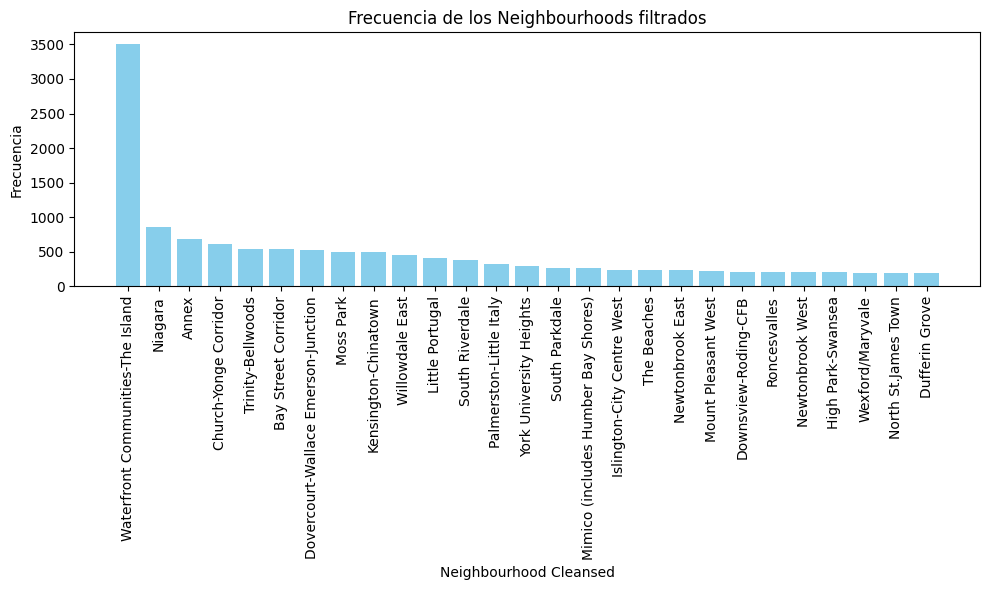

In [165]:
categorias_seleccionadas = frecuencia_acumulada[frecuencia_acumulada < 60].index

# Paso 5: Filtrar el DataFrame original para incluir solo esas categorías
df_filtrado = datos_listings[datos_listings['neighbourhood_cleansed'].isin(categorias_seleccionadas)]

conteo_pareto = df_filtrado["neighbourhood_cleansed"].value_counts()

print(f"Waterfront Cominities representa el {100*conteo_pareto['Waterfront Communities-The Island']/len(datos_listings):.4f}%")

print(f"el 80% de los datos viene de {len(conteo_pareto)} de los neigbors que representa un {100*len(conteo_pareto)/len(conteo):.4f}%")

conteo_pareto

# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(conteo_pareto.index, conteo_pareto.values, color='skyblue')

# Paso 3: Añadir etiquetas y título
plt.xlabel('Neighbourhood Cleansed')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los Neighbourhoods filtrados')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor visualización
plt.tight_layout()  # Ajustar el gráfico para evitar recortes
plt.show()

Como se ve, en este caso la mayoría de los registros se encuentran en Waterfront Communities-The Island, representando el 16.03% de la población. Asimismo, al obtener el número de barrios que representan el 80% de las casas, nos damos cuenta que este es un 44.28% de los registros al realizar un análisis de pareto

## 2.2 Análisis de room type

In [166]:
rooms = list(datos_listings["room_type"].unique())
print(f"Hay {len(rooms)} tipos de habitaciones")
neighbours

Hay 3 tipos de habitaciones


['Little Portugal',
 'Waterfront Communities-The Island',
 'South Riverdale',
 'South Parkdale',
 'The Beaches',
 'Rosedale-Moore Park',
 'Bay Street Corridor',
 'Church-Yonge Corridor',
 'Niagara',
 'High Park North',
 'Woburn',
 'Junction Area',
 'Oakridge',
 'Cabbagetown-South St.James Town',
 'Annex',
 'Caledonia-Fairbank',
 'Casa Loma',
 'North St.James Town',
 'Blake-Jones',
 'Moss Park',
 'Mount Pleasant West',
 'Willowdale East',
 'Palmerston-Little Italy',
 'Flemingdon Park',
 'East End-Danforth',
 'Brookhaven-Amesbury',
 'Oakwood Village',
 'Dovercourt-Wallace Emerson-Junction',
 'Trinity-Bellwoods',
 'Roncesvalles',
 'Mimico (includes Humber Bay Shores)',
 'Woodbine Corridor',
 'Birchcliffe-Cliffside',
 'Broadview North',
 'Morningside',
 'Kensington-Chinatown',
 'High Park-Swansea',
 'Don Valley Village',
 'Danforth',
 'Newtonbrook West',
 'Playter Estates-Danforth',
 'Greenwood-Coxwell',
 'Regent Park',
 'Dufferin Grove',
 'North Riverdale',
 'Humewood-Cedarvale',
 'Mount 

En este caso, solamente existen 3 tipos de habitaciones, Entire home/apt, Private room y Shared room. Al realizar un conteo nos damos cuenta que

In [167]:
conteo = datos_listings["room_type"].value_counts()

print(f"Ent home representa un {100*conteo['Entire home/apt']/len(datos_listings):.4f}%")
print(f"Private room representa un {100*conteo['Private room']/len(datos_listings):.4f}%")
print(f"Shared room representa un {100*conteo['Shared room']/len(datos_listings):.4f}%")

conteo

Ent home representa un 64.6964%
Private room representa un 34.5384%
Shared room representa un 0.7652%


room_type
Entire home/apt    14120
Private room        7538
Shared room          167
Name: count, dtype: int64

Es posible ver entonces que Entire home/apt tiene un total de 14120 registros, lo cual representa un 64.69% de todos los registros, es decir, existe una preferencia en ofrecer habitaciones de tipo entire room en este caso

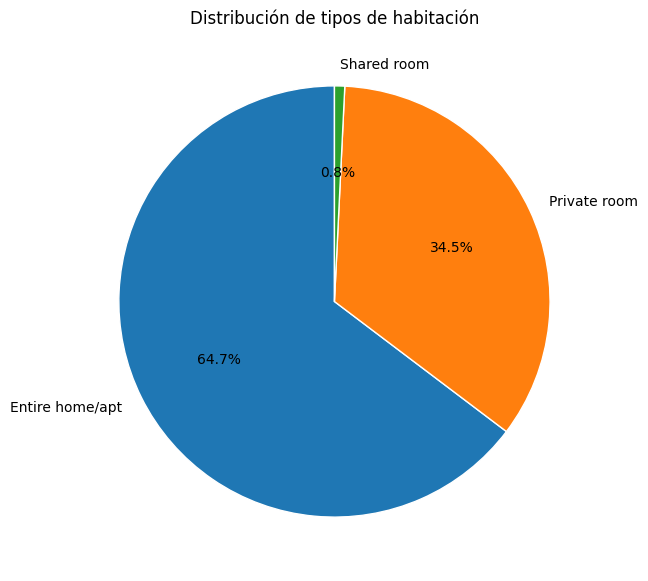

In [168]:
# Paso 2: Crear el gráfico de pie
plt.figure(figsize=(7, 7))  # Ajustar el tamaño del gráfico
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Paso 3: Añadir un título
plt.title('Distribución de tipos de habitación')

# Paso 4: Mostrar el gráfico
plt.show()


## 2.3 Price

Estos datos toca reestructurarlos para que queden codificados como flotantes

In [169]:
# Conversión de datos a flotantes
datos_listings["price_float"] = datos_listings["price"].str.replace("[$,]", "", regex=True).astype(float)

datos_listings_cleaned = datos_listings.dropna(subset="price_float")

In [170]:
print(f"mediana {datos_listings_cleaned['price_float'].median()}")
datos_listings_cleaned["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

mediana 139.0


count    16536.000000
mean       196.529874
std        308.192316
min          3.000000
5%          45.000000
25%         80.000000
50%        139.000000
75%        235.000000
95%        499.000000
max      12400.000000
Name: price_float, dtype: float64

[]

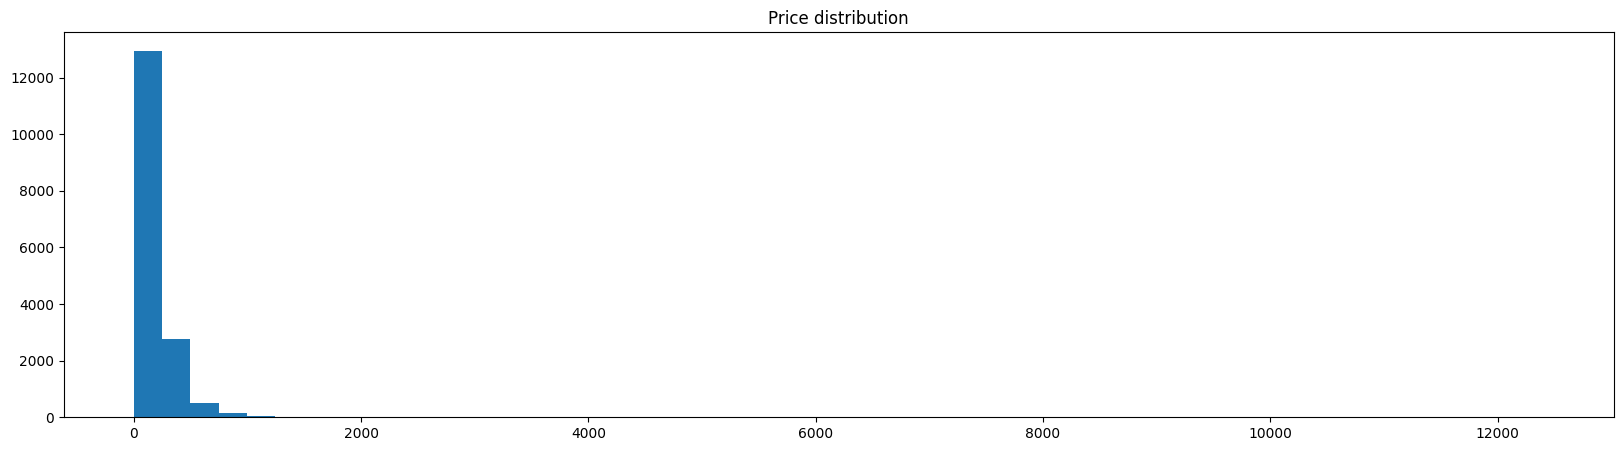

In [171]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(datos_listings_cleaned["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [172]:
#Forma de la distribución
price_skewness = skew(datos_listings_cleaned["price_float"])
price_kurtosis = kurtosis(datos_listings_cleaned["price_float"])

print(f"skewness {price_skewness}")
print(f"kurtosis {price_kurtosis}")

skewness 19.346335491255047
kurtosis 570.434776303857


Como se ve, existen valores muy extremos que podrían dañar nuestro análisis. En general, se encuentra que el 95% de los datos tienen valores de 499 dolares. Sin embargo, el valor mázimo se encuentra dos órdenes de magnitud mayores, por lo que es necesario eliminar los datos extremos. Para ello, eliminaremos los datos cuyos precios se encuentren fuera de los rangos intercuartilicos a más de $1.5*interQuartileRange + q3$ Asimismo, nos encontramos con valores de media y mediana que son muy distante, esto debido a la tendencia que tiene la media de ser afectada por los valores extremos, como el de 12.000. Por último, respecto a la forma de la distribución, nos encontramos que los precios están sesgados, y hay una mayor cantidad de precios con valor bajo. Por otro lado, el valor alto de la curtosis nos confirma la existencia de muchos valores extremos. Vale la pena aclarar que para el análisis se eliminaron los valores NA

In [173]:
# Eliminar los valores extremos
q1 = datos_listings_cleaned["price_float"].quantile(0.25)
q3 = datos_listings_cleaned["price_float"].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(155.0)

[]

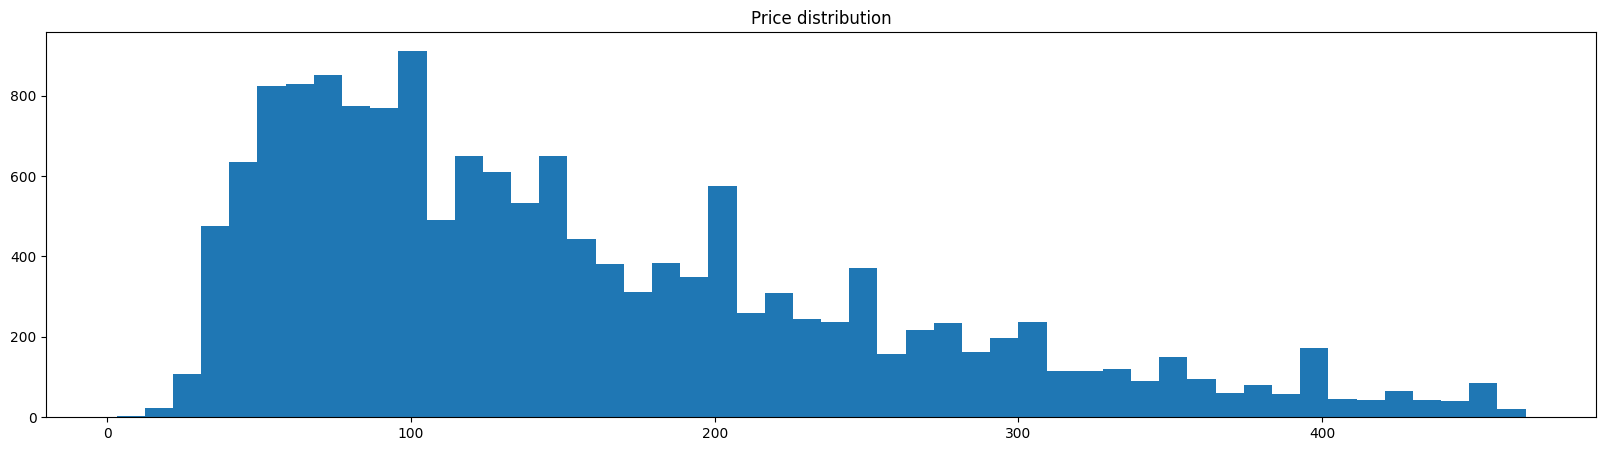

In [174]:
plt.figure(figsize=(20, 5))
plt.hist(datos_listings_cleaned.loc[datos_listings["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [175]:
price_skewness = skew(datos_listings_cleaned.loc[datos_listings_cleaned["price_float"] <= (q3 + 1.5 * iqr)]["price_float"])
price_kurtosis = kurtosis(datos_listings_cleaned.loc[datos_listings_cleaned["price_float"] <= (q3 + 1.5 * iqr)]["price_float"])

print(f"skewness {price_skewness}")
print(f"kurtosis {price_kurtosis}")
print(f"mediana {datos_listings_cleaned.loc[datos_listings_cleaned['price_float'] <= (q3 + 1.5 * iqr)]['price_float'].median()}")

datos_listings_cleaned.loc[datos_listings_cleaned["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].describe()

skewness 0.9735648663096677
kurtosis 0.2812374083750986
mediana 130.0


count    15608.000000
mean       156.624359
std         98.250572
min          3.000000
25%         79.000000
50%        130.000000
75%        212.000000
max        467.000000
Name: price_float, dtype: float64

Realizando el análisis necesario, eliminado los precios bajos nos damos cuenta que finalmente contamos con un total de 15608 datos. por lo que se eliminaron algo más de 1000 datos en el proceso de eliminación de valores extremos. Ahora, nos encontramos con que el máximo es 467 dolares, y con una media más cercana a la mediana. Sin embargo, seguimos encontrando una distribución muy sesgada a la derecha además. Sin embargo, la curtosis baja nos indica que efectivamente hubo una disminución en los valores extremos

## 2.4 review_scores_rating

In [176]:
datos_listings_cleaned = datos_listings.dropna(subset="review_scores_rating")
datos_listings_cleaned["review"] = datos_listings_cleaned["review_scores_rating"]
datos_listings_cleaned.head(3)

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_96435/3884757481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_listings_cleaned["review"] = datos_listings_cleaned["review_scores_rating"]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,review
0,1419,https://www.airbnb.com/rooms/1419,20240905175005,2024-09-06,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,NaN,"[""TV"", ""First aid kit"", ""Wifi"", ""Kitchen"", ""Dr...",NaN,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2024-09-06,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05,NaN,5.00
1,8077,https://www.airbnb.com/rooms/8077,20240905175005,2024-09-06,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,NaN,"[""Wifi"", ""Pool"", ""TV with standard cable"", ""Sh...",NaN,180,365,180,180,365,365,180.0,365.0,NaN,NaN,0,0,0,0,2024-09-06,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,f,2,1,1,0,0.92,NaN,4.84
2,26654,https://www.airbnb.com/rooms/26654,20240905175005,2024-09-06,city scrape,"World Class @ CN Tower, convention centre, The...","CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,Adela,2010-04-25,NaN,Welcome to Toronto! \r\n\r\nAfter our first me...,within a few hours,100%,38%,t,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,5.0,10.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Waterfront Communities-The Island,NaN,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Paid parking on premises"", ""Essentia...",$172.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,13,16,74,2024-09-06,42,0,0,2011-01-05,2023-09-01,

In [177]:
print(f"mediana {datos_listings_cleaned['review'].median()}")

#Forma de la distribución
price_skewness = skew(datos_listings_cleaned["review"])
price_kurtosis = kurtosis(datos_listings_cleaned["review"])

print(f"skewness {price_skewness}")
print(f"kurtosis {price_kurtosis}")
datos_listings_cleaned["review"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

mediana 4.89
skewness -4.89741934344152
kurtosis 36.07484058080028


count    16610.000000
mean         4.781629
std          0.378539
min          1.000000
5%           4.170000
25%          4.730000
50%          4.890000
75%          5.000000
95%          5.000000
max          5.000000
Name: review, dtype: float64

[]

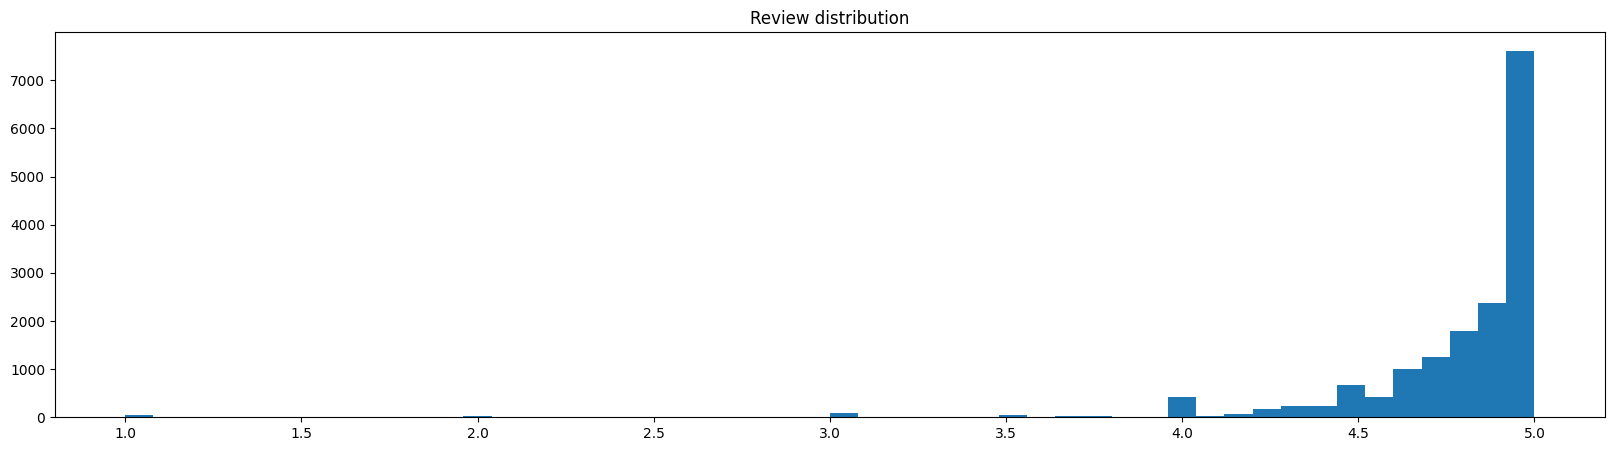

In [178]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(datos_listings_cleaned["review"], bins=50)
plt.title("Review distribution")
plt.plot()

Esta vez, nos encontramos con una variable que tiene una distribución con una cola muy larga hacia la izquierda. Nuevamente, se volverá a hacer un análisisi quitando los valores de outliers, para ello, nos quedaremos con los valores que estén a $q1-interCuartil*1.5$

In [179]:
# Eliminar los valores extremos
q1 = datos_listings_cleaned["review"].quantile(0.25)
q3 = datos_listings_cleaned["review"].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(0.2699999999999996)

[]

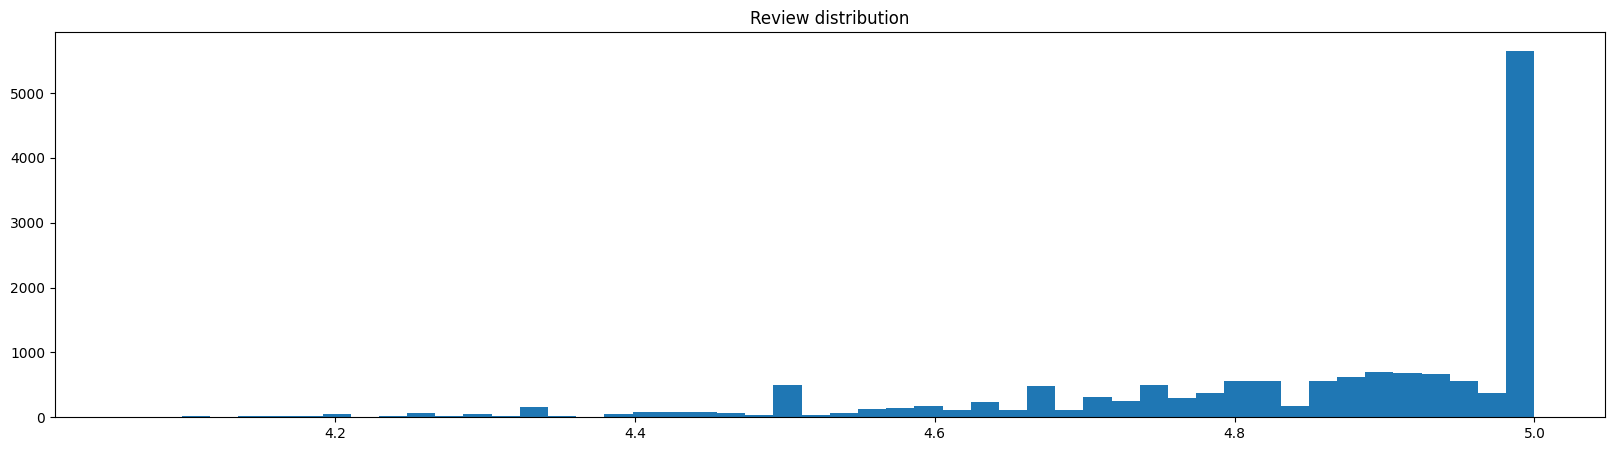

In [180]:
plt.figure(figsize=(20, 5))
plt.hist(datos_listings_cleaned[datos_listings_cleaned["review"] >= (q1 - 2.5*iqr)]["review"], bins=50)
plt.title("Review distribution")
plt.plot()

Sin embargo, siguen existiendo un gran número de propiedades que tienen un rating de 5 estrellas

[]

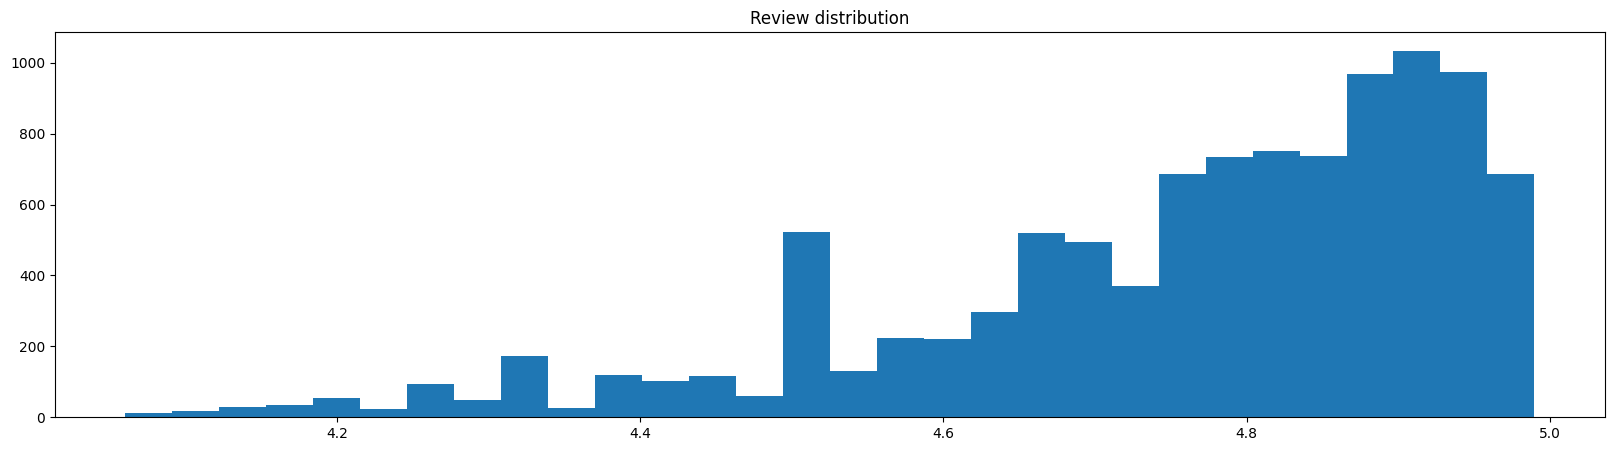

In [181]:
plt.figure(figsize=(20, 5))
plt.hist(datos_listings_cleaned[(datos_listings_cleaned["review"] >= (q1 - 2.5*iqr)) & (datos_listings_cleaned["review"] < 5)]["review"], bins=30)
plt.title("Review distribution")
plt.plot()

In [182]:
print(f"mediana {datos_listings_cleaned[(datos_listings_cleaned['review'] >= (q1 - 2.5*iqr)) & (datos_listings_cleaned['review'] < 5)]['review'].median()}")

#Forma de la distribución
price_skewness = skew(datos_listings_cleaned[(datos_listings_cleaned["review"] >= (q1 - 2.5*iqr)) & (datos_listings_cleaned["review"] < 5)]["review"])
price_kurtosis = kurtosis(datos_listings_cleaned[(datos_listings_cleaned["review"] >= (q1 - 2.5*iqr)) & (datos_listings_cleaned["review"] < 5)]["review"])

print(f"skewness {price_skewness}")
print(f"kurtosis {price_kurtosis}")
datos_listings_cleaned[(datos_listings_cleaned["review"] >= (q1 - 2*iqr)) & (datos_listings_cleaned["review"] < 5)]["review"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

mediana 4.81
skewness -1.1725714555610804
kurtosis 0.926184822721476


count    10164.000000
mean         4.762951
std          0.175916
min          4.200000
5%           4.400000
25%          4.670000
50%          4.810000
75%          4.900000
95%          4.960000
max          4.990000
Name: review, dtype: float64

Como se ve, una vez se realiza un análisis sin tener en cuenta los valores de 5 y obviando los outliers, es posible ya ver una tendencia más clara. En primer lugar, encontramos que los datos presentan una distribución con una cola muy larga  a la izquierda. Asimismo, luego de eliminar los datos, nos damos cuenta que existían muchos datos que tenían una calificación de 5, siendo que al ejecutar este filtro, se eliminaron cerca de 5000 datos. Se plantea como hipótesis que estos valores extremos de 1 y 5 estén relacionados con que todavía no haya suficientes reviews para que se estandarice a un número más "real". 

# 2.5 Amenities

Para realizar el análisis sobre esta columna, se deben transformar los datos con el fin de que puedan ser analizados, para ello se propone:

1. Convertir los valores de tipo string a una lista de python y realizar un conteo de cada vez que aparece un amenity
2. Realizar un conteo de cada uno de los amenities
3. Hacer un one hot encoding con las 10 amenities más comunes. Esto nos permitirá en un futuro entender si existe una relación entre los beneficios

debido a que existen varios amenities que son de la misma categoría, se pidió a una IA GPT que encontrara relaciones y nos generara un mapeo entre una expresión regular y con ello, amenities con temas similares se cuentan en una misma categoría

In [183]:
import re

amenities_mapping = {
    # Equipos electrónicos y entretenimiento
    r'tv.*': 'TV',
    r'.*hdtv.*': 'TV',
    r'.*roku.*': 'Streaming services',
    r'.*chromecast.*': 'Streaming services',
    r'.*netflix.*': 'Streaming services',
    r'.*prime.*': 'Streaming services',
    r'.*apple tv.*': 'Streaming services',
    r'.*disney.*': 'Streaming services',
    r'.*bo max.*': 'Streaming services',
    r'.*dvd player.*': 'DVD player',
    r'.*vd player.*': 'DVD player',
    
    # Internet y red
    r'.*wifi.*': 'Wifi',
    r'.*ethernet.*': 'Ethernet',
    
    # Cocina
    r'.*kitchen.*': 'Kitchen',
    r'.*oven.*': 'Oven',
    r'.*microwave.*': 'Microwave',
    r'.*stove.*': 'Stove',
    r'.*dishwasher.*': 'Dishwasher',
    r'.*refrigerator.*': 'Refrigerator',
    r'.*freezer.*': 'Refrigerator',
    r'.*coffee maker.*': 'Coffee maker',
    r'.*espresso.*': 'Coffee maker',
    r'.*drip.*': 'Coffee maker',
    r'.*keurig.*': 'Coffee maker',
    r'.*toaster.*': 'Toaster',
    r'.*baking sheet.*': 'Baking sheet',
    r'.*barbecue.*|.*bbq.*': 'BBQ',
    r'.*outdoor dining.*': 'Outdoor dining area',
    
    # Lavandería
    r'.*washer.*': 'Washer',
    r'.*dryer.*': 'Dryer',
    r'.*laundromat.*': 'Laundromat',
    
    # Climatización
    r'.*air conditioning.*': 'Air conditioning',
    r'.*ac.*': 'Air conditioning',
    r'.*heater.*|.*heating.*': 'Heating',
    r'.*fan.*': 'Fan',
    r'.*heated.*': 'Heating',
    r'.*floor heating.*': 'Heated floors',
    
    # Baño
    r'.*bathtub.*': 'Bathtub',
    r'.*shower.*': 'Shower',
    r'.*soap.*|.*shampoo.*|.*conditioner.*|.*toiletries.*': 'Toiletries',
    r'.*bidet.*': 'Bidet',
    r'.*towels.*': 'Towels',
    
    # Seguridad
    r'.*smoke alarm.*': 'Smoke alarm',
    r'.*carbon monoxide.*': 'Carbon monoxide alarm',
    r'.*fire extinguisher.*': 'Fire extinguisher',
    r'.*security system.*': 'Security system',
    r'.*cameras.*': 'Security cameras',
    r'.*window guards.*': 'Window guards',
    
    # Extras
    r'.*gym.*': 'Gym',
    r'.*pool.*': 'Pool',
    r'.*sauna.*': 'Sauna',
    r'.*hot tub.*': 'Hot tub',
    r'.*bbq.*': 'BBQ',
    r'.*parking.*': 'Parking',
    r'.*elevator.*': 'Elevator',
    r'.*balcony.*|.*patio.*': 'Balcony/Patio',
    r'.*view.*': 'View',
    r'.*garden.*': 'Garden',
    r'.*fireplace.*|.*fire pit.*': 'Fireplace',
    r'.*bicycle.*|.*bike.*': 'Bicycle',
    r'.*wine glasses.*': 'Wine glasses',
    r'.*long term stays allowed.*': 'Long term stays allowed',
    r'.*outdoor furniture.*': 'Outdoor furniture',
    r'.*luggage dropoff.*': 'Luggage dropoff',
    r'.*pet.*': 'Pets allowed',
    r'.*smart lock.*': 'Smart lock',
    
    # Equipos tecnológicos
    r'.*bluetooth.*': 'Bluetooth speaker',
    r'.*sound system.*': 'Sound system',
    r'.*game console.*': 'Game console',
    r'.*record player.*': 'Record player',
    
    # Limpieza
    r'.*cleaning.*': 'Cleaning service',
    r'.*cleaning products.*': 'Cleaning products',
    
    # Mobiliario
    r'.*sofa.*': 'Sofa',
    r'.*bed linens.*|.*pillows.*|.*blankets.*': 'Bedding',
    r'.*hangers.*': 'Hangers',
    r'.*storage.*|.*wardrobe.*|.*closet.*': 'Clothing storage',
    
    # Niños y bebés
    r'.*crib.*|.*high chair.*|.*changing table.*': 'Baby amenities',
    r'.*outlet covers.*': 'Baby safety',
    r'.*children.*': 'Children amenities',
    r'.*toys.*': 'Children amenities',
    r'.*playroom.*': 'Children playroom',
    
    # Transporte y movilidad
    r'.*ev charger.*': 'EV charger',
    r'.*garage.*': 'Garage',
    r'.*carport.*': 'Carport',
    
    # Juegos y entretenimiento
    r'.*ping pong.*': 'Ping pong',
    r'.*pool table.*': 'Pool table',
    r'.*board games.*|.*games.*': 'Games',
    r'.*bowling.*': 'Bowling alley',
    r'.*skate.*': 'Skate ramp',
    r'.*laser tag.*': 'Laser tag',
    r'.*kayak.*': 'Kayak',
    
    # Lujo y confort
    r'.*piano.*': 'Luxury',
    r'.*heated floor.*': 'Heated floors',
    r'.*conference room.*': 'Conference room',
    r'.*steam room.*': 'Steam room',
    
    # Horarios y servicios especiales
    r'.*hour.*|.*hours.*': 'Time-restricted access',
    r'.*breakfast.*': 'Breakfast',
    r'.*property manager.*': 'Property manager',
    r'.*media room.*': 'Media room',
    
    # Errores ortográficos comunes o abreviaciones
    r'.*netfli.*': 'Streaming services',
    r'.*isney.*': 'Streaming services',
    r'.*bo ma.*': 'Streaming services',
    r'.*roku.*': 'Streaming services',
    r'.*premium cabl.*': 'Streaming services',
    r'.*pple t.*': 'Streaming services',
    r'.*clean shampo.*': 'Toiletries',
    r'.*live clean.*': 'Toiletries',
    r'.*pantene.*|.*head and shoulder.*|.*dove.*|.*tresume.*': 'Toiletries',
    r'.*game console ps.*': 'Game console',
    r'.*ps.*|.*xbox.*|.*nintendo.*': 'Game console',
    r'.*vd.*': 'DVD player',
    r'.* hbo.*': 'Streaming services',
    r'.*fire t.*|.*fire tv.*': 'TV',
    r'.*hromecas.*': 'Streaming services',
    r'.*elevato.*': 'Elevator',
    r'.*window guard.*': 'Window guards',
    r'.*pool.*': 'Pool',
    r'.*gym.*': 'Gym',
    r'.*wifi.*': 'Wifi',
    r'.*sound.*': 'Sound system',
    r'.*safe.*': 'Safe',
}



# Función para normalizar un amenity y aplicar reglas de agrupación
def normalize_amenity(amenity_str):
    # Convertir a minúsculas
    amenity_str = amenity_str.lower().strip()
    
    # Remover números y caracteres no alfabéticos
    amenity_str = re.sub(r'[^a-z\s]', '', amenity_str)
    
    # Aplicar reglas de mapeo basadas en el diccionario
    for pattern, replacement in amenities_mapping.items():
        if re.match(pattern, amenity_str):
            return replacement
    
    # Si no coincide con ninguna regla, devolver el amenity original
    return amenity_str

# Contador de amenities
counter = {}

for amenities in datos_listings['amenities']:
    # Convertir la lista de amenities en una lista de strings, removiendo los caracteres innecesarios
    amenities_lst = amenities[1:-1].split(",")
    
    # Usar un set temporal para evitar contar dos veces el mismo amenity en una misma propiedad
    seen_amenities = set()
    
    for amenity in amenities_lst:
        # Normalizar el amenity
        amenity_str = normalize_amenity(amenity.strip()[1:-1])
        
        # Solo contar el amenity si no lo hemos contado ya en esta propiedad
        if amenity_str not in seen_amenities:
            counter[amenity_str] = counter.get(amenity_str, 0) + 1
            seen_amenities.add(amenity_str)

# Mostrar el diccionario resultante
counter



{'TV': 16276,
 'first aid kit': 9598,
 'Wifi': 21519,
 'Kitchen': 20374,
 'Dryer': 18777,
 'essentials': 17245,
 'Air conditioning': 20882,
 'Toiletries': 15470,
 'Smoke alarm': 20961,
 'Washer': 18229,
 'Heating': 19262,
 'Fire extinguisher': 12661,
 'Pool': 3314,
 'Parking': 15340,
 'Elevator': 6166,
 'Gym': 4514,
 'Bedding': 14189,
 'Long term stays allowed': 10765,
 'iron': 14060,
 'Stove': 13188,
 'single level home': 2254,
 'building staff': 663,
 'hot water': 16598,
 'Oven': 12491,
 'Children amenities': 1498,
 'Pets allowed': 3728,
 'Luggage dropoff': 5199,
 'Dishwasher': 9404,
 'Coffee maker': 12392,
 'dishes and silverware': 15435,
 'self checkin': 10769,
 'Microwave': 14372,
 'Balcony/Patio': 7825,
 'private entrance': 8301,
 'Refrigerator': 15552,
 'exercise equipment': 2268,
 'View': 3288,
 'Carbon monoxide alarm': 18595,
 'cooking basics': 14299,
 'Hot tub': 2376,
 'Hangers': 16947,
 'Ethernet': 2181,
 'host greets you': 2506,
 'Toaster': 9113,
 'BBQ': 4165,
 'hot water k

In [184]:
len(counter)

306

Como se ve, luego del procesamiento quedamos con un total de 306 categorías de amenities. Ahora, nos quedaremos con las x que más se repiten.

In [185]:
# Convertimos el diccionario a un DataFrame
df_counter = pd.DataFrame(list(counter.items()), columns=['Amenity', 'Count'])

# Ordenamos por el conteo de mayor a menor
df_counter_sorted = df_counter.sort_values(by='Count', ascending=False)

# Mostramos el top X (por ejemplo, top 10)
top_x = 10
df_counter_top_x = df_counter_sorted.head(top_x)

# Mostramos el resultado
print(df_counter_top_x)

                  Amenity  Count
2                    Wifi  21519
8             Smoke alarm  20961
6        Air conditioning  20882
3                 Kitchen  20374
10                Heating  19262
4                   Dryer  18777
37  Carbon monoxide alarm  18595
9                  Washer  18229
5              essentials  17245
40                Hangers  16947


De esta forma, encontramos el top 10 de amenities que tienen las propiedades. Como se ve, el amenitie más popular es el wifi, el cual se usa en 21519 propiedades.

En los listados de Airbnb, se observa que las comodidades más comunes son esenciales como WiFi, cocina, televisión, lavadora, y secadora, reflejando la necesidad de satisfacer a viajeros de corta y larga estancia. Además, hay una creciente oferta de entretenimiento moderno (servicios de streaming y consolas de videojuegos) y un enfoque en la seguridad (alarmas de humo y extintores). Aunque los lujos como piscinas, jacuzzis y gimnasios son menos frecuentes, se hipotiza que estos estén presentes en propiedades de alta gama. También se percibe un aumento en las amenidades sostenibles, como cargadores para autos eléctricos, y una clara atención a familias con niños y viajeros de trabajo remoto.

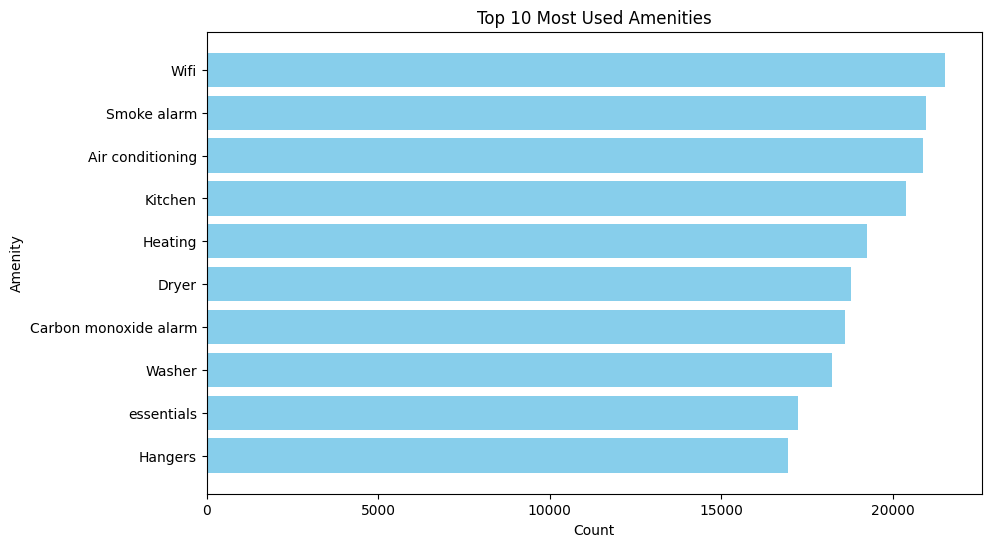

In [186]:
# Generamos el histograma
plt.figure(figsize=(10,6))
plt.barh(df_counter_top_x['Amenity'], df_counter_top_x['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.title('Top 10 Most Used Amenities')
plt.gca().invert_yaxis()  # Invertimos el eje Y para que el amenity con mayor count esté arriba
plt.show()

In [187]:
# Lista de los 10 principales amenities (puedes ajustar esta lista con tus 10 principales amenities)
top_10_amenities = ['TV', 'Wifi', 'Kitchen', 'Washer', 'Dryer', 
                    'Air conditioning', 'Parking', 'Heating', 
                    'Dishwasher', 'Pool']

# Para cada amenity en el top 10, creamos una columna en el DataFrame de One-Hot Encoding
for amenity in top_10_amenities:
    # Verificamos si el amenity está presente en la columna 'amenities' de cada propiedad
    datos_listings[amenity] = datos_listings['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Mostrar el DataFrame con el One-Hot Encoding de los 10 principales amenities
datos_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,TV,Wifi,Kitchen,Washer,Dryer,Air conditioning,Parking,Heating,Dishwasher,Pool
0,1419,https://www.airbnb.com/rooms/1419,20240905175005,2024-09-06,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,NaN,"[""TV"", ""First aid kit"", ""Wifi"", ""Kitchen"", ""Dr...",NaN,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2024-09-06,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.05,NaN,1,1,1,1,1,1,0,1,0,0
1,8077,https://www.airbnb.com/rooms/8077,20240905175005,2024-09-06,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,NaN,"[""Wifi"", ""Pool"", ""TV with standard cable"", ""Sh...",NaN,180,365,180,180,365,365,180.0,365.0,NaN,NaN,0,0,0,0,2024-09-06,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,f,2,1,1,0,0.92,NaN,1,1,0,0,0,1,0,1,0,1
2,26654,https://www.airbnb.com/rooms/26654,20240905175005,2024-09-06,city scrape,"World Class @ CN Tower, convention centre, The...","CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,Adela,2010-04-25,NaN,Welcome to Toronto! \r\n\r\nAfter our first me...,within a few hours,100%,38%,t,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,5.0,10.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Waterfront Communities-The Island,NaN,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Paid parking on premises"", ""Essentia...",

# 3. Estrategia de análisis

La estrategia del análisis se realizará en las siguientes fases:

## 3.1 Limpieza de los datos: 
Se realizará una limpieza de los datos según lo que se encontró previamente. En primer lugar, se contará únicamente con un análisis en los barrios más comunes, pues contamos con una mayor cantidad de información. En segundo lugar, se eliminarán los datos outliers en precio y ratings.

## 3.2 Relación entre precios y barrio: 
Esta relación nos podría entregar información de si existe alguna relación entre el precio de una casa y el barrio en que se encuentra ubicado. Para esta relación se puede realizar un boxplot, el cual permitirá ver si existe diferencia entre las medias de los precios y los barrios. Asimismo, en caso de existir medias muy cercanas en los precios de los diferentes barrios, se puede generar un análisis de ANOVA que permita identificar si existe una diferencia de medias. Se espera que este análisis permita conocer a los inversores saber en qué barrios vale la pena invertir.

## 3.3 Impacto de amenities en rating y precio
Mediante el uso de PCA se realizará un análisis que reduzca la dimensionalidad y permita entender la combinación de servicios más comunes y cómo esto impacta en el precio y el rating. Esto permitiría a los inversores saber qué servicios pueden ofrecer para mejorar el atractivo de sus propiedades.

## 3.4 Relación entre el número de reviews y rating:
Se realizará un scatterplot que permitirá entender por qué existen propiedades con ratings tan altos, y verificar si esto puede estar relacionado con propiedades que han sido pocas veces reservadas.

## 3.5 Relación precio - rating:
Se puede realizar un análisis de correlación entre el precio y el rating, y verificar si existe algún tipo de relación entre ambos. Asimismo, en caso de ser posible, se puede realizar una regresión lineal para predecir cómo el precio se asocia con el rating y viceversa.

## 3.6 Relación entre tipo de propiedad y rentabilidad (precio):
Agregar un análisis de la relación entre el tipo de propiedad (`room_type`) y el precio, utilizando gráficos como boxplots para comparar los precios medios entre distintos tipos de propiedades. Esto permitirá identificar qué tipo de propiedad (apartamento, casa entera, habitación compartida) tiende a generar más ingresos.

## 3.7 Relación entre el barrio, tipo de propiedad y precio:
Un análisis multivariado para observar cómo se comporta el precio al interactuar tanto el barrio como el tipo de propiedad. Se puede realizar un boxplot o gráfico de interacción para visualizar cómo varía el precio según ambas variables, ayudando a los inversores a identificar combinaciones de barrios y tipos de propiedad más lucrativas.

## 3.8 Comparación entre propiedades con y sin ciertos amenities clave:
Un análisis comparativo entre propiedades que tienen ciertos amenities clave (como piscina, wifi, aire acondicionado) y las que no. Se pueden usar boxplots o pruebas t para comparar los precios y ratings entre ambos grupos, ayudando a identificar qué comodidades aumentan el precio y mejoran el rating.


# 4. Implementación

In [236]:

# Crear una copia del dataframe original 'datos_listings' para trabajar sobre él
listings = datos_listings.copy()

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Rangos intercuartiles de precio
q1_price = listings['price'].quantile(0.25)
q3_price = listings['price'].quantile(0.75)
iqr_price = q3_price - q1_price
upper_bound_price = q3_price + 1.5 * iqr_price

# Rangos intercuartiles rating
q1_rating = listings['review_scores_rating'].quantile(0.25)
iqr_rating = listings['review_scores_rating'].quantile(0.75) - q1_rating
lower_bound_rating = q1_rating - 2.5 * iqr_rating

#1. Barrios de interés
conteo = datos_listings["neighbourhood_cleansed"].value_counts()
frecuencia_relativa = conteo / conteo.sum() * 100
frecuencia_acumulada = frecuencia_relativa.cumsum()
categorias_seleccionadas = frecuencia_acumulada[frecuencia_acumulada < 40].index

listings = listings[listings['neighbourhood_cleansed'].isin(categorias_seleccionadas)]

# 2. Filtrar precios fuera del rango intercuartil superior
listings = listings[listings['price'] <= upper_bound_price]

# 3. Filtrado de 'review_scores_rating' utilizando el rango intercuartil inferior
listings = listings[listings['review_scores_rating'] >= lower_bound_rating]


# Seleccionar solo las columnas de interés: neighbourhood, room_type, review_scores_rating, price, y amenities
columns_of_interest = ['neighbourhood_cleansed', 'room_type', 'review_scores_rating', 'price', 'amenities']
listings = listings[columns_of_interest]

listings = listings.dropna()

# Lista de los 10 principales amenities (puedes ajustar esta lista con tus 10 principales amenities)
top_10_amenities = ['TV', 'Wifi', 'Kitchen', 'Washer', 'Dryer', 
                    'Air conditioning', 'Parking', 'Heating', 
                    'Dishwasher', 'Pool']

# Para cada amenity en el top 10, creamos una columna en el DataFrame de One-Hot Encoding
for amenity in top_10_amenities:
    # Verificamos si el amenity está presente en la columna 'amenities' de cada propiedad
    listings[amenity] = listings['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [239]:
listings

,neighbourhood_cleansed,room_type,review_scores_rating,price,amenities,TV,Wifi,Kitchen,Washer,Dryer,Air conditioning,Parking,Heating,Dishwasher,Pool
2,Waterfront Communities-The Island,Entire home/apt,4.79,172.0,"[""Wifi"", ""Paid parking on premises"", ""Essentia...",1,1,1,0,0,0,0,1,1,0
8,Bay Street Corridor,Entire home/apt,4.17,148.0,"[""Wifi"", ""Dryer"", ""Essentials"", ""Cleaning prod...",1,1,1,1,1,1,0,1,0,0
10,Church-Yonge Corridor,Entire home/apt,4.63,163.0,"[""Wifi"", ""Dryer"", ""Essentials"", ""Cleaning prod...",1,1,1,1,1,1,0,1,1,0
12,Niagara,Private room,4.85,50.0,"[""Wifi"", ""Kitchen"", ""Backyard"", ""Dryer"", ""Indo...",1,1,1,1,1,1,0,1,0,0
13,Niagara,Private room,4.61,50.0,"[""Wifi"", ""Kitchen"", ""Dryer"", ""Lock on bedroom ...",0,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,Waterfront Communities-The Island,Entire home/apt,5.00,264.0,"[""Wifi"", ""Dryer"", ""Essentials"", ""Cleaning prod...",1,1,1,1,1,1,0,1,1,0
21663,Niagara,Entire home/apt,5.00,250.0,"[""Wifi"", ""Essentials"", ""Central heating"", ""Cle...",1,1,1,1,0,1,0,0,1,0
21666,Bay Street Corridor,Entire home/apt,5.00,194.0,"[""Wifi"", ""Dedicated workspace"", ""TV"", ""First a...",1,1,1,1,0,1,0,0,0,1
21675,Bay Street Corridor,Entire home/apt,5.00,231.0,"[""Wifi"", ""Central heating"", ""Cleaning products...",1,1,1,0,0,0,0,0,0,0


# 4.2 Relación precios y barrio

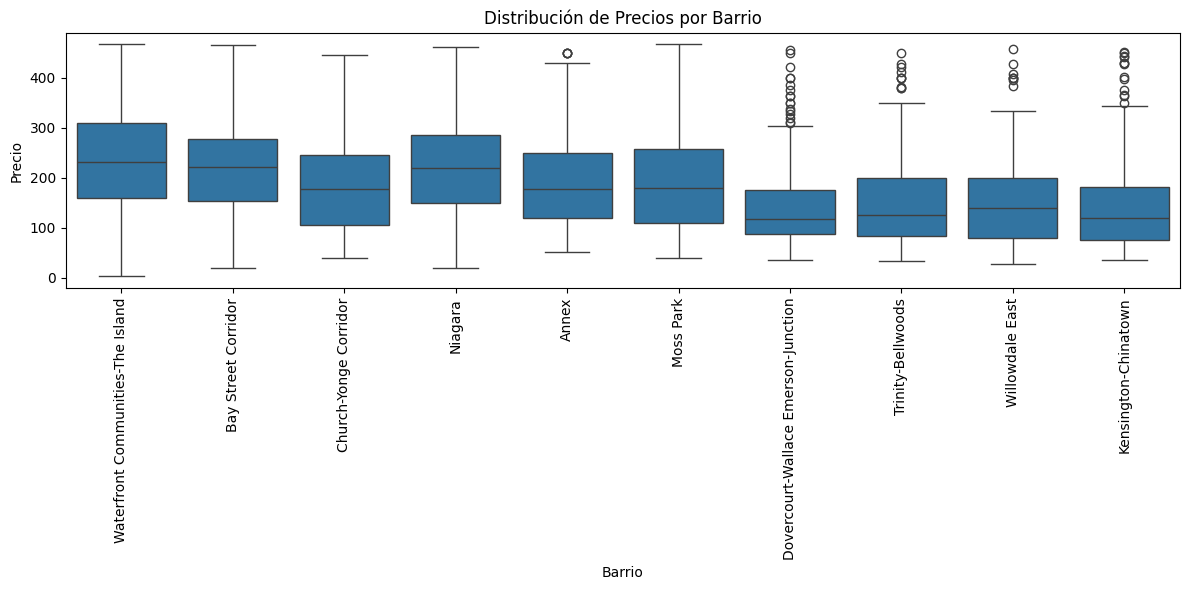

In [242]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un boxplot para visualizar la relación entre precios y barrios
sns.boxplot(x='neighbourhood_cleansed', y='price', data=listings)

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

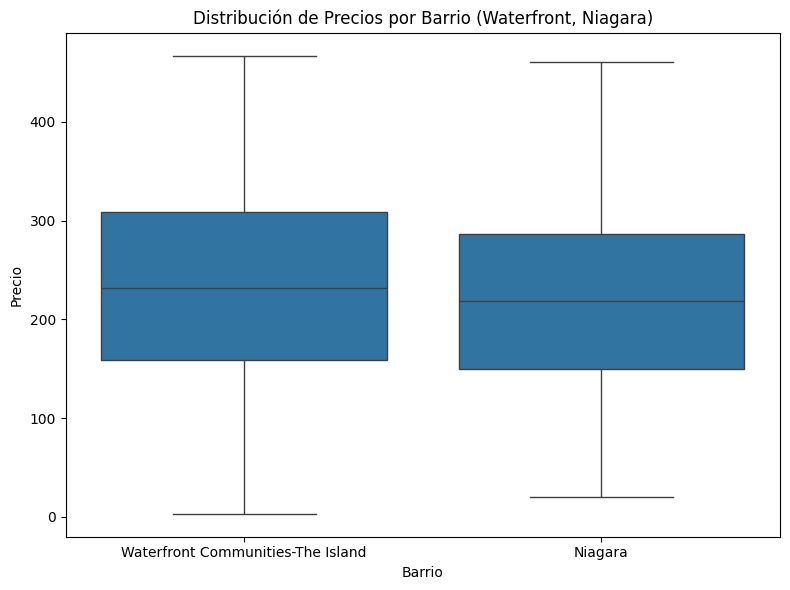

In [244]:
# Filtrar el dataframe para los barrios Waterfront, Church y Niagara
barrios_interes = ['Waterfront Communities-The Island', 'Niagara']
listings_filtrados = listings[listings['neighbourhood_cleansed'].isin(barrios_interes)]


# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un boxplot para visualizar la relación entre precios y barrios
sns.boxplot(x='neighbourhood_cleansed', y='price', data=listings_filtrados)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Barrio (Waterfront, Niagara)')
plt.xlabel('Barrio')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [245]:
from scipy import stats

# ANOVA: Comparar la media de los precios entre los tres barrios seleccionados
anova_result = stats.f_oneway(
    listings_filtrados[listings_filtrados['neighbourhood_cleansed'] == 'Waterfront Communities-The Island']['price'],
    listings_filtrados[listings_filtrados['neighbourhood_cleansed'] == 'Niagara']['price']
)

# Mostrar el resultado de ANOVA
print(f"Estadístico F: {anova_result.statistic}")
print(f"P-valor: {anova_result.pvalue}")

Estadístico F: 12.209859890517784
P-valor: 0.00048424368124602946


Como se ve, si existen diferencias entre los barrios y los precios de viviendas en el mismo. Sin embargo, nos damos cuenta que los dos mejores barrios son los de Waterfront y Niagara. Sobre ellos se realizó un análisis ANOVA que permitió ver que existe una direrencia entre las medias de ambos barrios

## 4.3 Impacto de amenities en rating y precio

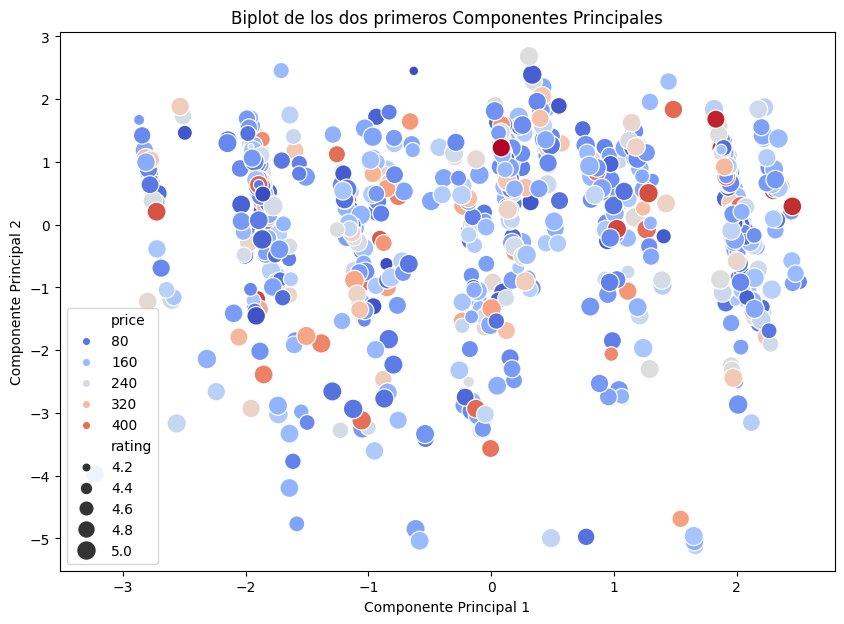

In [250]:
# Crear un biplot para visualizar las relaciones entre los componentes principales
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Variables a usar
X = listings[['price', 'review_scores_rating', 'TV', 'Wifi', 'Kitchen', 'Washer', 'Dryer', 'Air conditioning', 'Parking', 'Heating', 'Dishwasher', 'Pool']]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para obtener los primeros 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Crear un dataframe con los resultados del PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['price'] = listings['price']
pca_df['rating'] = listings['review_scores_rating']

# Graficar el biplot de los dos primeros componentes
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='price', size='rating', data=pca_df, palette='coolwarm', sizes=(20, 200))
plt.title('Biplot de los dos primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [252]:
from sklearn.decomposition import PCA
import pandas as pd

# Asumiendo que ya tienes tu dataframe listings y tus datos normalizados para los amenities
# También asumo que ya se eliminó cualquier fila con valores nulos

# Selecciona solo las columnas de las amenities y los precios
amenities_columns = ['TV', 'Wifi', 'Kitchen', 'Washer', 'Dryer', 'Air conditioning', 
                     'Parking', 'Heating', 'Dishwasher', 'Pool']  # Selecciona las que corresponden

# Realizamos PCA en los datos de amenities
pca = PCA()
pca_components = pca.fit_transform(listings[amenities_columns])

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i}' for i in range(1, len(amenities_columns) + 1)])

# Añadimos la columna del precio para la correlación
pca_df['price'] = listings['price'].astype(float)  # Asegúrate de que 'price' sea numérico

# Filtramos solo los componentes 3 a 6 y el precio
correlation_matrix = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'price']]

# Calculamos la correlación entre los componentes y el precio
correlations = correlation_matrix.corr()['price']
print(correlations)


PC1      0.008146
PC2     -0.027699
PC3     -0.016905
PC4     -0.010934
PC5      0.020440
PC6     -0.054606
price    1.000000
Name: price, dtype: float64


Los amenities no parecen influir significativamente en los precios: Basándonos en los resultados, las combinaciones de amenities que capturan los componentes principales no parecen ser un factor importante que afecte los precios de las propiedades. Puede ser que otros factores, como la ubicación (neighbourhood), el tamaño de la propiedad, o el tipo de propiedad (room_type), tengan más peso en el precio.

## 4.4 Relación entre el número de reviews y rating:

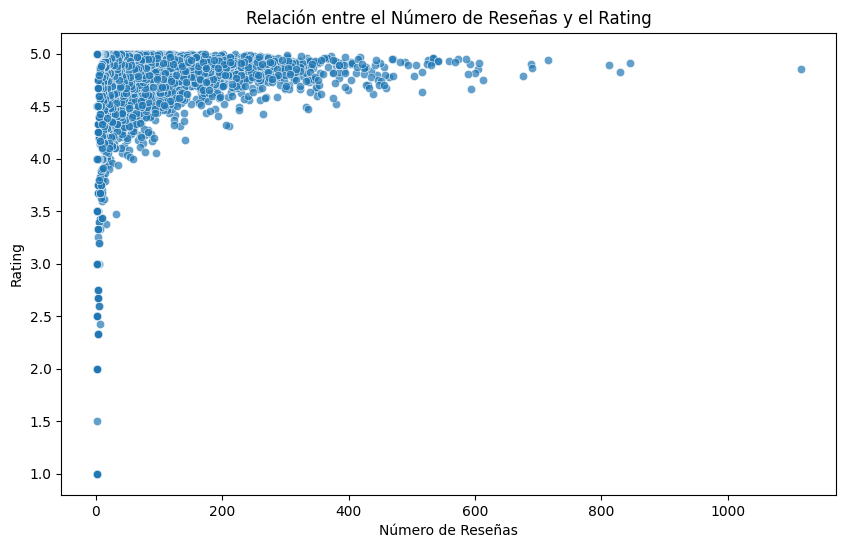

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que no haya nulos en estas columnas
listings_filtered = datos_listings.dropna(subset=['review_scores_rating', 'number_of_reviews'])

# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=listings_filtered, alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Relación entre el Número de Reseñas y el Rating')
plt.xlabel('Número de Reseñas')
plt.ylabel('Rating')

# Mostrar la gráfica
plt.show()


Este gráfico sugiere que, en general, las propiedades tienden a recibir buenos ratings, lo que podría estar influenciado por las expectativas de los usuarios o la calidad de las propiedades. Sin embargo, las propiedades con menos reseñas tienden a tener más variabilidad en sus ratings, lo que indica que es importante tener un volumen considerable de opiniones para obtener una valoración más precisa.

## 4.5 Relación precio - rating:

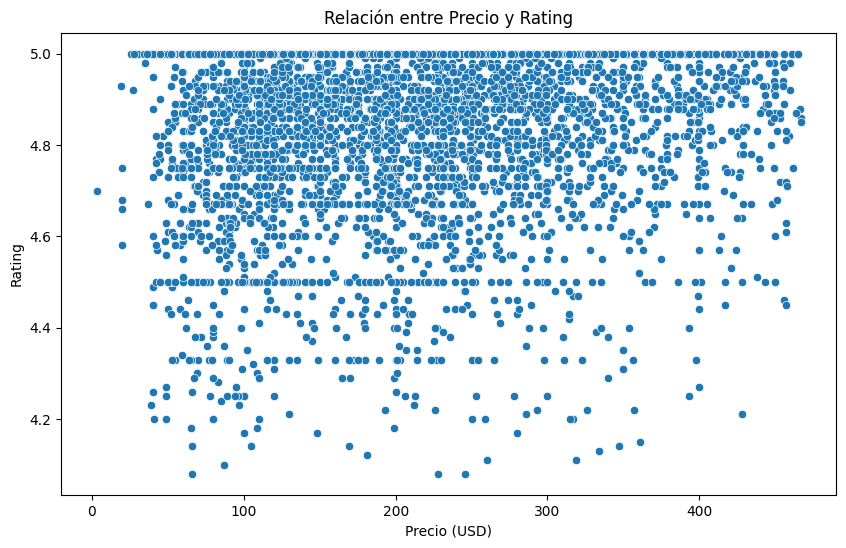

Correlación entre precio y rating: 0.06203602599007821


In [254]:

# Scatterplot para visualizar la relación entre precio y rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=listings)
plt.title('Relación entre Precio y Rating')
plt.xlabel('Precio (USD)')
plt.ylabel('Rating')
plt.show()

# Calcular correlación entre precio y rating
correlation_price_rating = listings['price'].corr(listings['review_scores_rating'])
print(f"Correlación entre precio y rating: {correlation_price_rating}")

La gráfica de dispersión entre el precio y el rating muestra que no existe una relación entre el rating y el precio. Esto indica que la mayoría de propiedades suelen tener puntuaciones positivas y el precio y el rating no están relacionados. Sin embargo, existe una diferencia en la variabilidad del rating a con respecto al precio, siendo que las propiedades con mayor valor tienen menor dispersión en sus ratings. A continuación profundizaremos más en eso

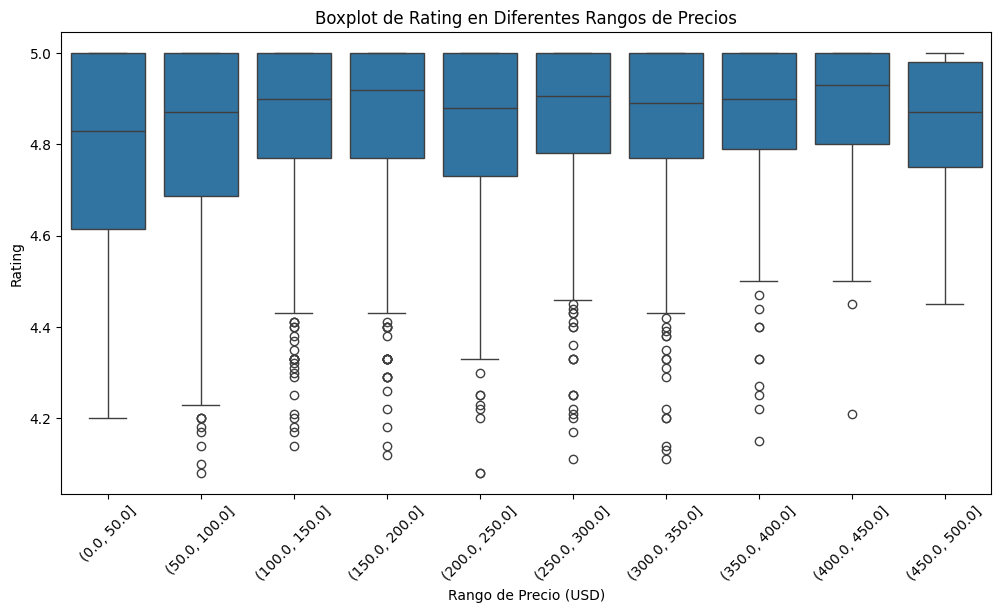

In [257]:
# Crear una nueva columna con rangos de precios
listings['price_range'] = pd.cut(listings['price'], bins=np.arange(0, listings['price'].max()+50, 50))

# Crear el boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='price_range', y='review_scores_rating', data=listings)

# Títulos y etiquetas
plt.title('Boxplot de Rating en Diferentes Rangos de Precios')
plt.xlabel('Rango de Precio (USD)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [259]:

# Filtrar los datos para quitar los nulos en review_scores_rating
filtered_data = listings.dropna(subset=['review_scores_rating'])

# Realizar el ANOVA
anova_result = stats.f_oneway(
    *[filtered_data['review_scores_rating'][filtered_data['price_range'] == r] 
      for r in filtered_data['price_range'].unique()]
)

# Resultados del ANOVA
print(f'Estadístico F: {anova_result.statistic}')
print(f'P-valor: {anova_result.pvalue:.4f}')

Estadístico F: 5.509239581736584
P-valor: 0.0000


Como se ve, el gráfico de boxplot muestra la relación entre el rating y los diferentes rangos de precios de sociedades. A pesar de que la mediana en todos los casos es similar, es posible ver que los rangos de precios presentan mayor dispersión para precios más bajos, especialmente en rangos de 0-100$. Por su lado, se realizó un análisis ANOVA con un p-valor de 0, que indica que estadisticamente existen diferencias significativas en las medias de los ratings, y los precios de las propiedades están asociados a variaciones en los ratings

## 3.6 Relación entre tipo de propiedad y precio:

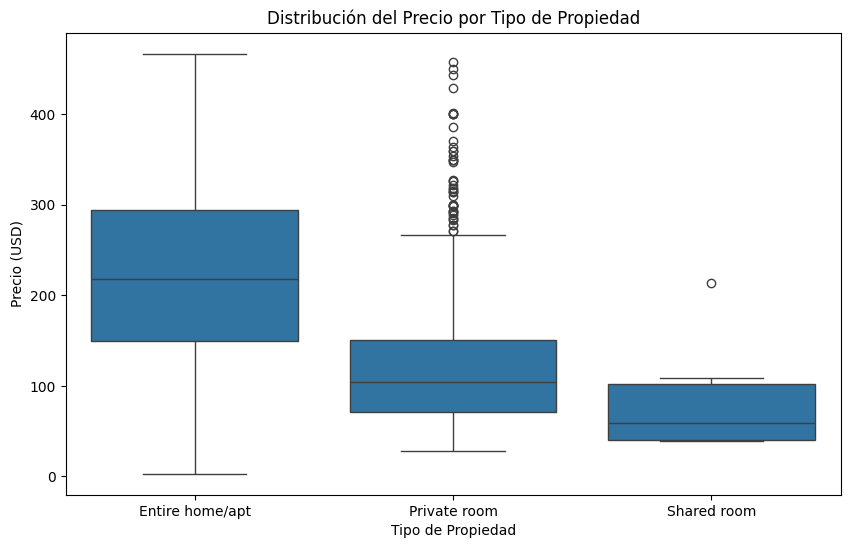

In [263]:
# Configurando el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot para comparar el precio en diferentes tipos de propiedad
sns.boxplot(x='room_type', y='price', data=listings)

# Título y etiquetas del gráfico
plt.title('Distribución del Precio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio (USD)')

# Mostrar el gráfico
plt.show()

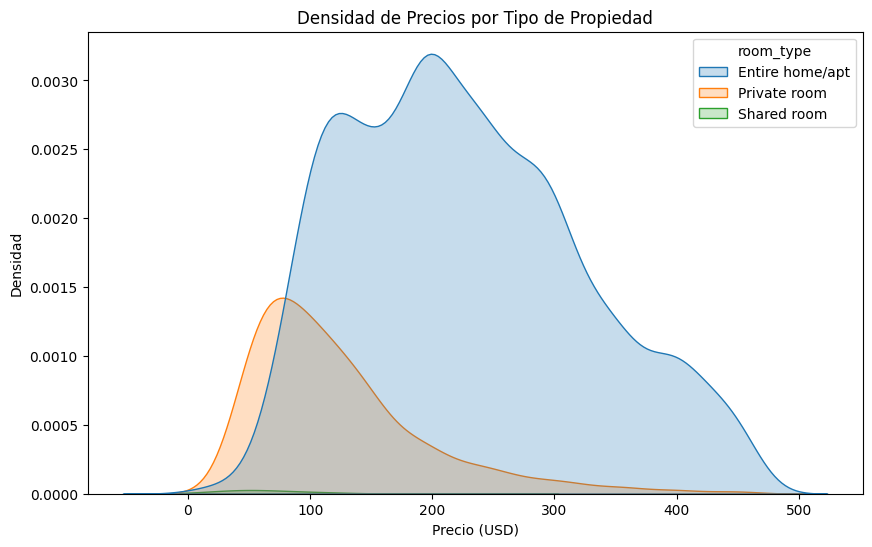

In [264]:
plt.figure(figsize=(10, 6))

# Crear gráficos de densidad por tipo de propiedad
sns.kdeplot(data=listings, x="price", hue="room_type", fill=True)

# Título y etiquetas del gráfico
plt.title('Densidad de Precios por Tipo de Propiedad')
plt.xlabel('Precio (USD)')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

In [261]:
# Obtener estadísticas descriptivas del precio por tipo de propiedad
desc_stats = listings.groupby('room_type')['price'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Mostrar las estadísticas descriptivas
print(desc_stats)

                       mean  median        std   min    max  count
room_type                                                         
Entire home/apt  227.393555   218.0  96.870682   3.0  467.0   3631
Private room     124.047786   104.5  72.852043  28.0  458.0    858
Shared room       73.846154    59.0  49.690452  39.0  214.0     13


Las visualizaciones muestran que las propiedades de tipo "Entire home/apt" (casa/apartamento completo) tienen los precios más altos y una mayor variabilidad en comparación con "Private room" (habitaciones privadas) y "Shared room" (habitaciones compartidas). Las habitaciones compartidas son las más económicas, con precios bajos y poca variabilidad. Las habitaciones privadas tienen precios intermedios, con una mayor dispersión que las compartidas pero inferior a las propiedades completas. Estos resultados sugieren que las propiedades completas generan más ingresos potenciales, aunque con mayor variabilidad en los precios.

## 3.7 Relación entre el barrio, tipo de propiedad y precio

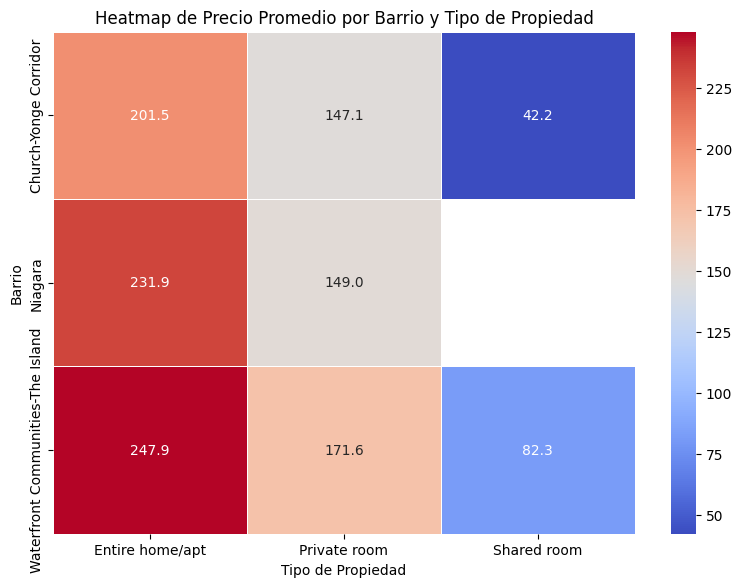

In [267]:
# Crear una tabla de precio promedio por barrio y tipo de propiedad
heatmap_data = filtered_data.pivot_table(values='price', index='neighbourhood_cleansed', columns='room_type', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Heatmap de Precio Promedio por Barrio y Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()


El mapa de calor muestra que que, en general, los precios más altos pertenecen al barrio Waterfront independientemente del tipo de casa que se está prestando. Por su lado, encontramos también que el Entire/home suelen tener precios más altos dentro de la plataforma, mientras que las habitaciones compartidas tienen precios más bajos.